In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import t

In [2]:
df = pd.read_csv('LaptopSales.csv')

In [3]:
df.shape

(297572, 16)

In [4]:
df.isna().sum()

Date                     208
Configuration              0
CustomerPostcode           0
StorePostcode              0
RetailPrice            13443
ScreenSize                 0
BatteryLife                0
RAM                        0
ProcessorSpeeds            0
IntegratedWireless         0
HDSize                     0
BundledApplications        0
customerX                  0
customerY                  0
storeX                   148
storeY                   148
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

Date                   0
Configuration          0
CustomerPostcode       0
StorePostcode          0
RetailPrice            0
ScreenSize             0
BatteryLife            0
RAM                    0
ProcessorSpeeds        0
IntegratedWireless     0
HDSize                 0
BundledApplications    0
customerX              0
customerY              0
storeX                 0
storeY                 0
dtype: int64

In [7]:
df.shape

(283787, 16)

In [8]:
df.describe()

,Configuration,RetailPrice,ScreenSize,BatteryLife,RAM,ProcessorSpeeds,HDSize,customerX,customerY,storeX,storeY
count,283787.000000,283787.000000,283787.000000,283787.00000,283787.000000,283787.000000,283787.000000,283787.000000,283787.000000,283787.000000,283787.000000
mean,379.618164,508.119244,15.810023,4.97218,2.102341,1.929285,132.089631,530776.899805,179876.755961,530689.985292,179779.857224
std,231.443281,104.607622,0.981790,0.81046,1.144554,0.365605,97.797432,4577.722792,4639.056600,4225.584153,3951.088637
min,1.000000,168.000000,15.000000,4.00000,1.000000,1.500000,40.000000,512253.000000,164886.000000,517917.000000,168302.000000
25%,193.000000,440.000000,15.000000,4.00000,1.000000,1.500000,40.000000,529107.000000,178633.000000,528924.000000,178440.000000
50%,347.000000,500.000000,15.000000,5.00000,2.000000,2.000000,80.000000,531026.000000,181078.000000,529902.000000,179641.000000
75%,576.000000,575.000000,17.000000,6.00000,2.000000,2.400000,120.000000,533096.000000,182060.000000,534057.000000,182961.000000
max,864.000000,890.000000,17.000000,6.00000,4.000000,2.400000,300.000000,549065.000000,199846.000000,541428.000000,190628.000000


In [9]:
df.HDSize.unique()

array([ 40,  80, 120, 300], dtype=int64)

In [10]:
df['RetailPrice'].mean()

508.1192443628496

In [11]:
sample_size = 10
seed = 19
df_sample = df.sample(n=sample_size, random_state=seed)
df_sample

,Date,Configuration,CustomerPostcode,StorePostcode,RetailPrice,ScreenSize,BatteryLife,RAM,ProcessorSpeeds,IntegratedWireless,HDSize,BundledApplications,customerX,customerY,storeX,storeY
29695,4/16/2008 12:55,77,W2 3QH,SW1P 3AU,455.0,15,4,2,2.0,No,120,Yes,526473,180866,529902.0,179641.0
275573,7/15/2008 15:24,752,SW2 2UB,SW1P 3AU,640.0,17,6,1,2.0,No,300,No,530812,174017,529902.0,179641.0
137274,9/21/2008 3:55,327,SW11 3BW,SW1V 4QQ,625.0,15,6,1,2.4,Yes,300,Yes,527497,176369,528924.0,178440.0
66723,03/05/2008 09:02,173,SE1 2TF,E2 0RY,445.0,15,5,1,2.0,No,120,Yes,533102,180143,535652.0,182961.0
183766,10/18/2008 10:16,451,E12 5BP,SE8 3JD,515.0,17,4,1,2.0,Yes,80,Yes,542008,185622,537175.0,177885.0
5294,10/09/2008 21:10,17,E1W 2PN,SE1 2BN,350.0,15,4,1,2.0,Yes,40,Yes,534601,180050,534057.0,179682.0
54376,12/26/2008 11:16,140,SE1 2PF,SE1 2BN,540.0,15,4,4,2.4,No,80,No,532900,180300,534057.0,179682.0
253439,12/23/2008 19:59,659,EC4A 3JB,SW1V 4QQ,570.0,17,5,2,2.4,Yes,80,Yes,531470,181361,528924.0,178440.0
221774,09/07/2008 23:18,570,W1W 5QU,NW5 2QH,600.0,17,4,4,2.4,No,40,No,528866,182122,529248.0,185213.0
166720,10/13/2008 8:37,386,WC1A 1BL,NW5 2QH,570.0,15,6,4,1.5,Yes,40,No,530081,181432,529248.0,185213.0


In [12]:
df_sample['RetailPrice'].mean()

531.0

In [13]:
df_sample['RetailPrice'].std()

91.15920140062659

In [14]:
data = []
for i in range(1,41):
    df_sample = df.sample(n=i, random_state=seed)
    avg_retail_price = df_sample['RetailPrice'].mean()
    data.append(avg_retail_price)

In [15]:
#data

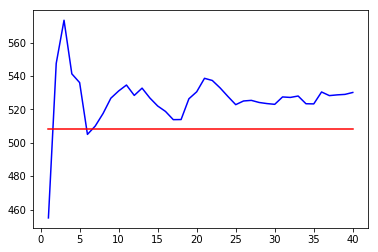

In [16]:
plt.plot(range(1,41), data, 'b')
plt.plot(range(1,41), [df['RetailPrice'].mean()]*len(range(1,41)), 'r')

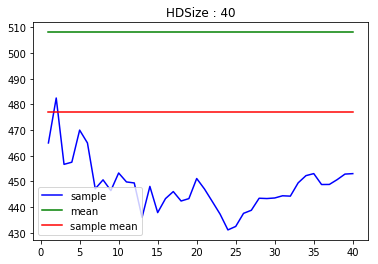

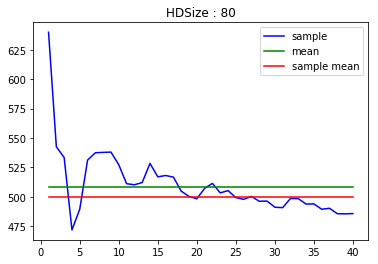

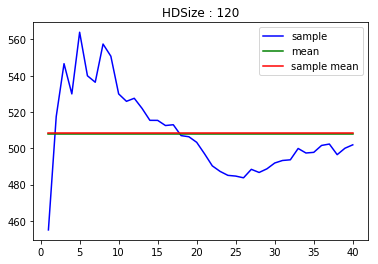

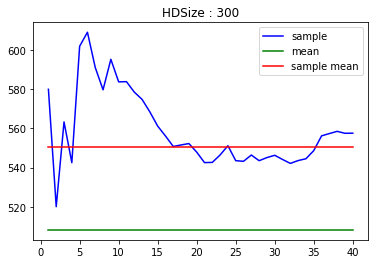

In [17]:
for i in df.HDSize.unique():
    df2 = df[df.HDSize == i]
    data = []
    for j in range(1,41):
        df_sample = df2.sample(n=j, random_state=seed)
        avg_retail_price = df_sample['RetailPrice'].mean()
        data.append(avg_retail_price)
    plt.plot(range(1,41), data, 'b', label = 'sample')
    plt.plot(range(1,41), [df['RetailPrice'].mean()]*len(range(1,41)), 'g', label = 'mean')
    plt.plot(range(1,41), [df2['RetailPrice'].mean()]*len(range(1,41)), 'r', label = 'sample mean')
    plt.legend()
    plt.title('HDSize : '+str(i))
    plt.show()

In [18]:
count_size = []
for i in df.HDSize.unique():
    count_size.append(df[df.HDSize == i]['HDSize'].count())

In [19]:
count_size_percent = [((i/sum(count_size))*100).round() for i in count_size]

In [20]:
count_size_percent

[25.0, 26.0, 25.0, 24.0]

In [21]:
data = {'HDSize':df.HDSize.unique(),
        'ratio':count_size_percent
}
data = pd.DataFrame(data)
data.set_index('HDSize')

,ratio
HDSize,
40,25.0
80,26.0
120,25.0
300,24.0


In [22]:
df_sample = df[df.HDSize == 40].sample(n=25, random_state=seed)
df_sample = df_sample.append(df[df.HDSize == 80].sample(n=26, random_state=seed))
df_sample = df_sample.append(df[df.HDSize == 120].sample(n=25, random_state=seed))
df_sample = df_sample.append(df[df.HDSize == 300].sample(n=24, random_state=seed))

In [23]:
df_sample.describe()

,Configuration,RetailPrice,ScreenSize,BatteryLife,RAM,ProcessorSpeeds,HDSize,customerX,customerY,storeX,storeY
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,336.770000,490.990000,15.620000,4.990000,1.970000,1.951000,132.800000,530958.110000,180164.730000,530578.300000,179727.95000
std,226.090259,109.516338,0.929646,0.834787,1.167359,0.357459,98.617514,4282.650663,4336.283683,4158.680926,3703.43099
min,5.000000,275.000000,15.000000,4.000000,1.000000,1.500000,40.000000,519103.000000,167077.000000,519585.000000,168302.00000
25%,155.750000,430.000000,15.000000,4.000000,1.000000,1.500000,70.000000,529444.000000,178923.000000,528924.000000,178440.00000
50%,306.000000,480.000000,15.000000,5.000000,2.000000,2.000000,80.000000,531022.000000,181132.500000,529902.000000,179641.00000
75%,471.250000,545.250000,17.000000,6.000000,2.000000,2.400000,120.000000,533080.500000,181838.500000,534057.000000,181567.00000
max,860.000000,840.000000,17.000000,6.000000,4.000000,2.400000,300.000000,544486.000000,190071.000000,541428.000000,190628.00000


In [24]:
T = (531.0 - 508.1192443628496)/(91.15920140062659/(10**(1/2))) 
T

0.793724618989862

In [25]:
alpha = 0.05/2
t.ppf(1-alpha, 9)

2.2621571627409915

In [26]:
df_sample_1 = df[df.HDSize == 40]
df_sample_2 = df[df.HDSize == 80]

In [27]:
df1_mean = df_sample_1.RetailPrice.mean()
df2_mean = df_sample_2.RetailPrice.mean()
df1_std = df_sample_1.RetailPrice.std()**2/df_sample_1.HDSize.count()
df2_std = df_sample_2.RetailPrice.std()**2/df_sample_2.HDSize.count()

(df1_mean-df2_mean)/((df1_std+df2_std)**(1/2))

-44.189447082350554

In [28]:
df_sample_1 = df[df.HDSize == 40].sample(n=25, random_state=seed)
df_sample_2 = df[df.HDSize == 80].sample(n=26, random_state=seed)

In [32]:
df1_mean = df_sample_1.RetailPrice.mean()
df2_mean = df_sample_2.RetailPrice.mean()
df1_std = df_sample_1.RetailPrice.std()**2/df_sample_1.HDSize.count()
df2_std = df_sample_2.RetailPrice.std()**2/df_sample_2.HDSize.count()

T = (df1_mean-df2_mean)/((df1_std+df2_std)**(1/2))
T

-2.1414150295360606

In [40]:
v_star = math.floor(((df1_std+df2_std)**2)/((df1_std**2/(df_sample_1.HDSize.count()-1))+(df2_std**2/(df_sample_2.HDSize.count()-1))))
v_star

45

In [39]:
alpha = 0.05/2
t.ppf(1-alpha, v_star)

2.0141033848332923